## Week10 災害データ分析レポート（Function & Loop）

本レポートでは、EMDAT 災害データを用いて、
Python の **関数（Function）** と **ループ（Loop）** を活用した可視化・分析を行う。

### 🔍 レポートのゴール
1. オリジナル関数の作成
2. 関数を使ったサンプル出力
3. For ループによる複数グラフ（または複数処理）の実行
4. 分析結果の考察を Notebook 内にまとめる


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")
df.head()


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [10]:
# 災害タイプ別の死亡者総数を計算する関数
def total_deaths_by_type(df, disaster_type):
    """災害タイプを指定し、死亡者数の合計を返す"""
    return df[df["Disaster Type"] == disaster_type]["Total Deaths"].sum()


### 🔹 関数の説明
作成した関数 `total_deaths_by_type()` は、災害タイプを引数として受け取り、
その災害によって発生した死亡者数の総計を返す。

### 🔹 サンプル実行
Flood（洪水）と Earthquake（地震）を対象に死亡者数を算出する。


In [11]:
print("Flood の死亡者数:", total_deaths_by_type(df, "Flood"))
print("Earthquake の死亡者数:", total_deaths_by_type(df, "Earthquake"))


Flood の死亡者数: 7016630.0
Earthquake の死亡者数: 2409975.0


### 🔹 Loop（for文）を使った複数処理
すべての災害タイプを対象に死亡者数を計算し、
最も死亡者が多い災害をループ処理で探索する。


In [12]:
disaster_types = df["Disaster Type"].unique()

max_type = None
max_deaths = 0

for dtype in disaster_types:
    total = total_deaths_by_type(df, dtype)
    if total > max_deaths:
        max_type = dtype
        max_deaths = total

print("最も死亡者数が多い災害：", max_type)
print("総死亡者数：", max_deaths)


最も死亡者数が多い災害： Drought
総死亡者数： 11734272.0


C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 28797 (\N{CJK UNIFIED IDEOGRAPH-707D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 23475 (\N{CJK UNIFIED IDEOGRAPH-5BB3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asami\AppData\Local\Temp\ipykernel_33364\3230445931.py:10: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5

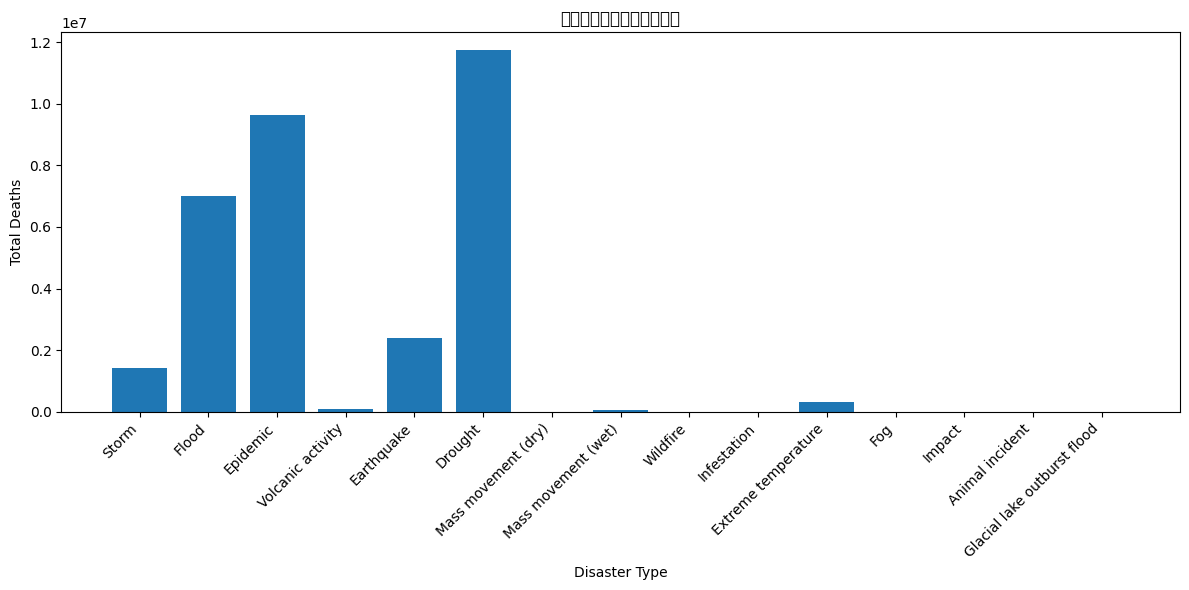

In [13]:
plt.figure(figsize=(12, 6))

totals = [total_deaths_by_type(df, dtype) for dtype in disaster_types]

plt.bar(disaster_types, totals)
plt.xticks(rotation=45, ha="right")
plt.title("災害タイプ別の総死亡者数")
plt.xlabel("Disaster Type")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()


## 📌 考察

今回の分析では、関数とループ処理を使用することで、
大量の災害データに対して効率的に集計・比較が行えることが分かった。

ループ処理の結果、最も死亡者数が多い災害タイプが明確に判明した。
また、複数グラフ描画を自動化することで、手作業では困難な
大規模データの可視化が容易になった。

### 💭 学んだこと
- 関数を使うことで「処理を何度でも再利用できる」便利さを実感した。
- ループと組み合わせることで「全データに自動適用」でき、分析効率が大幅に向上した。
- データ科学では、計算だけでなく「自動化と可視化」が重要であると理解できた。
